# Finance & Analytics Club

## MACD (Moving Average Convergence Divergence)

It is a trend following momentum indicator which is calculated by taking the difference of 2 exponential moving averages of an asset price (typically 26 period EMA and 12 period EMA).

A signal line is also calculated which is moving average of MACD line(typically 9 period) calculated in the above step.

The MACD line cutting the signal line from below signals a bullish period and the former cutting the latter from above signals a bearish period. This is called crossover strategy.

Many false-positives, expecially during sideways market.

This indicator is used in conjuction with other indicators.

More info at - "https://www.investopedia.com/terms/m/macd.asp"

Import necessary libraries


In [1]:
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt

Download historical data for required stocks

In [13]:
ticker = "RELIANCE.NS"
ohlcv = pdr.get_data_yahoo(ticker,dt.date.today()-dt.timedelta(1825),dt.date.today())

In [14]:
ohlcv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-06,419.000000,410.700012,418.000000,412.325012,5638734.0,384.318604
2015-04-07,418.049988,413.024994,413.024994,416.424988,9726422.0,388.140106
2015-04-08,434.750000,416.450012,416.750000,432.950012,11347420.0,403.542664
2015-04-09,449.500000,429.399994,432.750000,447.549988,12469862.0,417.150970
2015-04-10,454.399994,444.549988,447.475006,452.174988,11576924.0,421.461823
...,...,...,...,...,...,...
2020-03-26,1116.900024,1042.349976,1095.800049,1066.199951,20912841.0,1066.199951
2020-03-27,1107.300049,1046.199951,1095.000000,1065.599976,19044609.0,1065.599976
2020-03-30,1074.800049,1020.000000,1040.599976,1030.449951,13820078.0,1030.449951


#### Function to calculate MACD typical values a = 12; b =26, c =9

In [15]:
def MACD(DF,a,b,c):
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean() # ewm is Exponential Moving Average 
    df["MA_Slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    return df

In [16]:
df = MACD(ohlcv, 12, 26, 9)

In [17]:
df.tail(100) # shows last 100 data points in our dataframe

,High,Low,Open,Close,Volume,Adj Close,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,,
2019-11-08,1459.650024,1441.300049,1449.000000,1445.500000,5494844.0,1445.500000,1438.342321,1398.743409,39.598912,43.573067
2019-11-11,1444.250000,1422.550049,1439.099976,1427.800049,5192423.0,1427.800049,1436.720433,1400.895753,35.824680,42.023389
2019-11-13,1475.900024,1430.000000,1430.000000,1472.300049,11532364.0,1472.300049,1442.194220,1406.184960,36.009260,40.820564
2019-11-14,1481.599976,1455.800049,1476.000000,1462.750000,6518339.0,1462.750000,1445.356648,1410.374963,34.981685,39.652788
2019-11-15,1486.800049,1463.150024,1465.650024,1470.849976,7173674.0,1470.849976,1449.278698,1414.854593,34.424105,38.607051
...,...,...,...,...,...,...,...,...,...,...
2020-03-26,1116.900024,1042.349976,1095.800049,1066.199951,20912841.0,1066.199951,1051.626109,1160.725537,-109.099428,-112.627252
2020-03-27,1107.300049,1046.199951,1095.000000,1065.599976,19044609.0,1065.599976,1053.775934,1153.679199,-99.903265,-110.082455
2020-03-30,1074.800049,1020.000000,1040.599976,1030.449951,13820078.0,1030.449951,1050.187322,1144.551107,-94.363785,-106.938721


Text(0.5, 1.0, 'Volume')

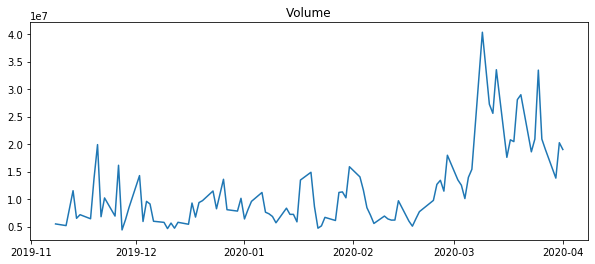

In [18]:
plt.figure(figsize = (10,4))
plt.plot(df.iloc[-100:,4].index, df.iloc[-100:,4].values)
plt.title('Volume')

Text(0.5, 1.0, 'Adjusted Close Price')

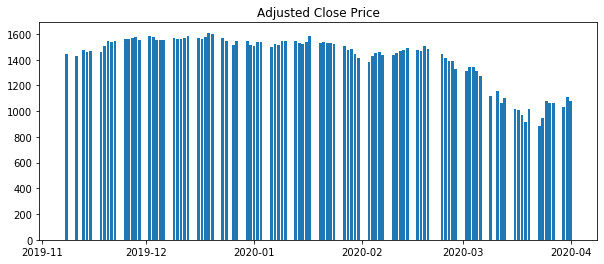

In [19]:
plt.figure(figsize = (10,4))
plt.bar(df.iloc[-100:,5].index, df.iloc[-100:,5].values)
plt.title('Adjusted Close Price')

## Finally the MACD graph

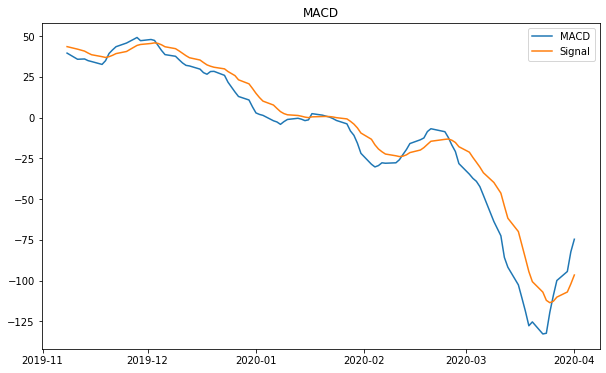

In [20]:
plt.figure(figsize = (10,6))
plt.plot(df.iloc[-100:,[-2,-1]])
plt.title('MACD')
plt.legend(('MACD','Signal'),loc='best')

plt.show()

#### you can clearly see that initially there werea lot of false positives. 